In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv('news_api')

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [5]:
# Fetch the Bitcoin news articles & sample
# publishedAt =The date and time that the article was published, in UTC (+000).
bitcoin_art= newsapi.get_everything(q="Bitcoin", language = "en", page_size= 20 , sort_by="publishedAt")

bitcoin_art['articles'][4]['content']

'Here is what you need to know on Thursday, July 30:\r\nThe dollar maintained the sour tone heading into the US Federal Reserve announcement, the most relevant event of the day. The central bank kept it… [+1683 chars]'

In [6]:
# Fetch the Ethereum news articles & sample
ethereum_art= newsapi.get_everything(q="Ethereum", language = "en", page_size = 20, sort_by = "publishedAt")
ethereum_art['articles'][0]

{'source': {'id': None, 'name': 'CoinDesk'},
 'author': 'Daniel Cawrey',
 'title': 'Market Wrap: Bitcoin Sticks to $11,000; Derivatives, DeFi Keep Growing',
 'description': 'The cryptocurrency markets are finally heating up in July.',
 'url': 'https://www.coindesk.com/market-wrap-bitcoin-sticks-to-11000-derivatives-defi-keep-growing',
 'urlToImage': 'https://static.coindesk.com/wp-content/uploads/2020/07/cdbpijul29-scaled.jpg',
 'publishedAt': '2020-07-29T20:43:27Z',
 'content': 'Bitcoin, crypto derivatives and DeFi continue to be hot in late July.\r\n<ul><li>Bitcoin (BTC) trading around $11,236 as of 20:00 UTC (4 p.m. ET). Gaining 2% over the previous 24 hours.</li><li>Bitcoin… [+4441 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bit_sent = []
for article in bitcoin_art['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        bit_sent.append({"Compound": compound, "Negative": neg, "Neutral": neu, "Positive": pos, "text": text })
    except AttributeError:
        pass
bit_df = pd.DataFrame(bit_sent)
cols = ["Compound","Negative","Neutral","Positive","text"]
bit_df = bit_df[cols]
bit_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3612,0.000,0.928,0.072,(Source: imgflip)\r\nToday the Dividend Kings ...
1,0.3612,0.000,0.928,0.072,(Source: imgflip)\r\nToday the Dividend Kings ...
2,0.4215,0.000,0.920,0.080,"Bitcoin, crypto derivatives and DeFi continue ..."
3,-0.1027,0.041,0.959,0.000,Richard Myers is an decentralized applications...
4,0.0000,0.000,1.000,0.000,"Here is what you need to know on Thursday, Jul..."


In [8]:
# Create the Bitcoin sentiment scores DataFrame

In [9]:
# Create the ethereum sentiment scores DataFrame
eth_sent = []
for article in ethereum_art['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        eth_sent.append({"Compound": compound, "Negative": neg, "Neutral": neu, "Positive": pos, "text": text })
    except AttributeError:
        pass
eth_df = pd.DataFrame(eth_sent)
cols = ["Compound","Negative","Neutral","Positive","text"]
eth_df = eth_df[cols]
eth_df.tail()

,Compound,Negative,Neutral,Positive,text
15,0.0000,0.0,1.000,0.000,"Earlier in July, a new initiative to preserve ..."
16,0.3612,0.0,0.925,0.075,<ul><li>Bitcoin has stagnated after surging as...
17,-0.4588,0.1,0.900,0.000,During a turbulent year when cryptocurrencies ...
18,0.0000,0.0,1.000,0.000,Crypto has been on a tear in the last week.\r\...
19,0.2960,0.0,0.934,0.066,Mona El Isa would never go back to traditional...


In [10]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.121370,0.040800,0.896350,0.062900
std,0.453309,0.076637,0.084154,0.062725
min,-0.883400,0.000000,0.731000,0.000000
25%,-0.025675,0.000000,0.839000,0.000000
50%,0.361200,0.000000,0.918500,0.073500
75%,0.421500,0.045000,0.935750,0.084250
max,0.763400,0.262000,1.000000,0.219000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.201780,0.012900,0.927650,0.059400
std,0.290718,0.032029,0.062357,0.054212
min,-0.458800,0.000000,0.816000,0.000000
25%,0.000000,0.000000,0.910500,0.000000
50%,0.261150,0.000000,0.925500,0.074000
75%,0.376275,0.000000,1.000000,0.083000
max,0.735100,0.100000,1.000000,0.184000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
## test data frame of text column 
lemmatizer = WordNetLemmatizer()

new_bit = pd.DataFrame(bit_df['text'])
article= new_bit['text'][3]# article number, must specify or get error
regex= re.compile("[^a-zA-Z]")
re_clean = regex.sub(" ", article)
words= word_tokenize(re_clean)
lem = [lemmatizer.lemmatize(word) for word in words] 
output = [word.lower()for word in words if word.lower() not in sw]

print()
print(article)
print()
print(re_clean)
print()
print(lem)
print()
print(output)


NameError: name 'sw' is not defined

In [14]:
##
new_bit.head()

,text
0,(Source: imgflip)\r\nToday the Dividend Kings ...
1,(Source: imgflip)\r\nToday the Dividend Kings ...
2,"Bitcoin, crypto derivatives and DeFi continue ..."
3,Richard Myers is an decentralized applications...
4,"Here is what you need to know on Thursday, Jul..."


In [15]:
## test all individual functions on a single article
article= bitcoin_art['articles'][0]['content']
token=[]

sw = set(stopwords.words('english'))
regex= re.compile("[^a-zA-Z]")
re_clean = regex.sub(" ", article)
words= word_tokenize(re_clean)
lem = [lemmatizer.lemmatize(word) for word in words] 
output = [word.lower()for word in words if word.lower() not in sw]
token.append(output)
print(article)
print()
print(re_clean)
print()
print(lem)
print()
print(output)

(Source: imgflip)
Today the Dividend Kings had their weekly conference call and Chuck Carnevale mentioned that never in his 50 years of asset management experience has he seen such a bifurcated mark… [+39136 chars]

 Source  imgflip   Today the Dividend Kings had their weekly conference call and Chuck Carnevale mentioned that never in his    years of asset management experience has he seen such a bifurcated mark          chars 

['Source', 'imgflip', 'Today', 'the', 'Dividend', 'Kings', 'had', 'their', 'weekly', 'conference', 'call', 'and', 'Chuck', 'Carnevale', 'mentioned', 'that', 'never', 'in', 'his', 'year', 'of', 'asset', 'management', 'experience', 'ha', 'he', 'seen', 'such', 'a', 'bifurcated', 'mark', 'char']

['source', 'imgflip', 'today', 'dividend', 'kings', 'weekly', 'conference', 'call', 'chuck', 'carnevale', 'mentioned', 'never', 'years', 'asset', 'management', 'experience', 'seen', 'bifurcated', 'mark', 'chars']


In [16]:
##bitcoin 
token_bit = []
token_bit_original = []
for x in range(20):
    article= bitcoin_art['articles'][x]['content']
    sw = set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z]")
    re_clean = regex.sub(" ", article)
    words= word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words] 
    output = [word.lower()for word in words if word.lower() not in sw]
    token_bit_original.append(output)
    output = str(output)
    token_bit.append(output)
   

In [17]:
#token_bit_original

In [18]:
token_bit

["['source', 'imgflip', 'today', 'dividend', 'kings', 'weekly', 'conference', 'call', 'chuck', 'carnevale', 'mentioned', 'never', 'years', 'asset', 'management', 'experience', 'seen', 'bifurcated', 'mark', 'chars']",
 "['source', 'imgflip', 'today', 'dividend', 'kings', 'weekly', 'conference', 'call', 'chuck', 'carnevale', 'mentioned', 'never', 'years', 'asset', 'management', 'experience', 'seen', 'bifurcated', 'mark', 'chars']",
 "['bitcoin', 'crypto', 'derivatives', 'defi', 'continue', 'hot', 'late', 'july', 'ul', 'li', 'bitcoin', 'btc', 'trading', 'around', 'utc', 'p', 'et', 'gaining', 'previous', 'hours', 'li', 'li', 'bitcoin', 'chars']",
 "['richard', 'myers', 'decentralized', 'applications', 'engineer', 'gotenna', 'global', 'mesh', 'labs', 'online', 'censorship', 'surveillance', 'persist', 'long', 'local', 'fiat', 'currencies', 'way', 'pay', 'chars']",
 "['need', 'know', 'thursday', 'july', 'dollar', 'maintained', 'sour', 'tone', 'heading', 'us', 'federal', 'reserve', 'announceme

In [19]:
##ethereum 
token_eth = []
token_eth_original = []
for x in range(20):
    article= ethereum_art['articles'][x]['content']
    sw = set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z]")
    re_clean = regex.sub(" ", article)
    words= word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words] 
    output = [word.lower()for word in words if word.lower() not in sw]
    token_eth_original.append(output)
    output = str(output) #allowed me to add the list as a column entry, but has quotations??
    token_eth.append(output)


In [20]:
token_eth #_original

["['bitcoin', 'crypto', 'derivatives', 'defi', 'continue', 'hot', 'late', 'july', 'ul', 'li', 'bitcoin', 'btc', 'trading', 'around', 'utc', 'p', 'et', 'gaining', 'previous', 'hours', 'li', 'li', 'bitcoin', 'chars']",
 "['saskatchewan', 'sk', 'july', 'cnw', 'blockchain', 'venture', 'capital', 'inc', 'bvci', 'pleased', 'announce', 'launch', 'cadt', 'new', 'digital', 'currency', 'canada', 'support', 'custodial', 'services', 'chars']",
 "['ledger', 'suffered', 'data', 'breach', 'crypto', 'mining', 'india', 'comes', 'questions', 'new', 'decentralized', 'finance', 'defi', 'looks', 'offer', 'lending', 'saving', 'opportunities', 'pos', 'token', 'holders', 'youre', 'readin', 'chars']",
 "['executive', 'vote', 'among', 'mkr', 'token', 'holders', 'makerdao', 'ecosystem', 'resulted', 'addition', 'mana', 'native', 'currency', 'virtual', 'world', 'decentraland', 'new', 'collateral', 'type', 'means', 'chars']",
 "['one', 'key', 'metric', 'suggests', 'ethereum', 'eth', 'enjoyed', 'much', 'faster', 'ra

In [21]:
# Create a new tokens column for bitcoin
btoken = pd.DataFrame(token_bit)
bit_df['tokens']=btoken
bit_df

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3612,0.000,0.928,0.072,(Source: imgflip)\r\nToday the Dividend Kings ...,"['source', 'imgflip', 'today', 'dividend', 'ki..."
1,0.3612,0.000,0.928,0.072,(Source: imgflip)\r\nToday the Dividend Kings ...,"['source', 'imgflip', 'today', 'dividend', 'ki..."
2,0.4215,0.000,0.920,0.080,"Bitcoin, crypto derivatives and DeFi continue ...","['bitcoin', 'crypto', 'derivatives', 'defi', '..."
3,-0.1027,0.041,0.959,0.000,Richard Myers is an decentralized applications...,"['richard', 'myers', 'decentralized', 'applica..."
4,0.0000,0.000,1.000,0.000,"Here is what you need to know on Thursday, Jul...","['need', 'know', 'thursday', 'july', 'dollar',..."
5,0.0000,0.000,1.000,0.000,Getty Images\r\nAFP via Getty Images\r\nWinds ...,"['getty', 'images', 'afp', 'via', 'getty', 'im..."
6,0.4404,0.000,0.917,0.083,About 93% of all bitcoin address balances are ...,"['bitcoin', 'address', 'balances', 'estimated'..."
7,0.4215,0.000,0.917,0.083,A new study from Bitcoin startup Veriphi finds...,"['new', 'study', 'bitcoin', 'startup', 'veriph..."
8,0.3818,0.000,0.912,0.088,The Venezuelan government recently announced t...,"['venezuelan', 'government', 'recently', 'anno..."
9,-0.7650,0.185,0.815,0.000,Crypto Ban\r\nAccording to a Tuesday U.S. Mari...,"['crypto', 'ban', 'according', 'tuesday', 'u',..."


In [22]:
### Create a new tokens column for ethereum
etoken = pd.DataFrame(token_eth)

eth_df['tokens']=etoken
eth_df

,Compound,Negative,Neutral,Positive,text,tokens
0,0.4215,0.000,0.920,0.080,"Bitcoin, crypto derivatives and DeFi continue ...","['bitcoin', 'crypto', 'derivatives', 'defi', '..."
1,0.6808,0.000,0.847,0.153,"SASKATCHEWAN, SK, July 29, 2020 /CNW/ - Blockc...","['saskatchewan', 'sk', 'july', 'cnw', 'blockch..."
2,-0.1531,0.092,0.833,0.075,"Ledger suffered a data breach, crypto mining i...","['ledger', 'suffered', 'data', 'breach', 'cryp..."
3,0.0000,0.000,1.000,0.000,An executive vote among MKR token holders in t...,"['executive', 'vote', 'among', 'mkr', 'token',..."
4,0.7351,0.000,0.816,0.184,One key metric suggests that Ethereum (ETH) ha...,"['one', 'key', 'metric', 'suggests', 'ethereum..."
5,0.3400,0.000,0.926,0.074,"Money protocol Aave is going fully autonomous,...","['money', 'protocol', 'aave', 'going', 'fully'..."
6,0.3400,0.000,0.926,0.074,"Money protocol Aave is going fully autonomous,...","['money', 'protocol', 'aave', 'going', 'fully'..."
7,0.2263,0.066,0.818,0.115,With the battle for CBDC dominance in the East...,"['battle', 'cbdc', 'dominance', 'east', 'heati..."
8,0.4404,0.000,0.914,0.086,"CHARLESTON, S.C., July 29, 2020 /PRNewswire/ -...","['charleston', 'c', 'july', 'prnewswire', 'bla..."
9,0.0000,0.000,1.000,0.000,Leading cloud software company's culture of cu...,"['leading', 'cloud', 'software', 'company', 'c..."


In [23]:
## leave for reference, my columns values had quotation marks,
##thats why i had a second list, but did not get desired results




---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
##prac###
eart=ethereum_art['articles'][2]['content']
#print(eart)
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z]")
    re_clean = regex.sub(" ", article)
    words= word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words] 
    output = [word.lower()for word in words if word.lower() not in sw]
    return output
processed = process_text(eart)
#print(processed)   
word_counts = Counter(token_bit_original[0])
#print(dict(word_counts))
big_bit_count = Counter(ngrams(token_bit_original[0], n=2))
#print(dict(big_bit_count))
print(dict(big_bit_count.most_common(10)))


{('source', 'imgflip'): 1, ('imgflip', 'today'): 1, ('today', 'dividend'): 1, ('dividend', 'kings'): 1, ('kings', 'weekly'): 1, ('weekly', 'conference'): 1, ('conference', 'call'): 1, ('call', 'chuck'): 1, ('chuck', 'carnevale'): 1, ('carnevale', 'mentioned'): 1}


In [26]:
# Generate the Bitcoin N-grams where N=2
list_of_bit = bit_df['text'].to_list()
list_of_bit = (','.join(list_of_bit))
list_of_bit
input_text = list_of_bit
word_counts = Counter(list_of_bit)
big_bit_count = Counter(ngrams(processed, n=2))
print(dict(big_bit_count))

{('mona', 'el'): 1, ('el', 'isa'): 1, ('isa', 'would'): 1, ('would', 'never'): 1, ('never', 'go'): 1, ('go', 'back'): 1, ('back', 'traditional'): 1, ('traditional', 'finance'): 1, ('finance', 'former'): 1, ('former', 'goldman'): 1, ('goldman', 'sachs'): 1, ('sachs', 'vice'): 1, ('vice', 'president'): 1, ('president', 'developed'): 1, ('developed', 'melon'): 1, ('melon', 'protocol'): 1, ('protocol', 'vehicle'): 1, ('vehicle', 'creating'): 1, ('creating', 'ethereum'): 1, ('ethereum', 'based'): 1, ('based', 'hedge'): 1, ('hedge', 'funds'): 1, ('funds', 'without'): 1, ('without', 'spe'): 1, ('spe', 'chars'): 1}


In [27]:
# Generate the Ethereum N-grams where N=2
list_of_eth = eth_df['text'].to_list()
list_of_eth = (','.join(list_of_eth))
list_of_eth
word_counts = Counter(list_of_eth)
big_eth_count = Counter(ngrams(processed, n=2))
print(dict(big_eth_count))

{('mona', 'el'): 1, ('el', 'isa'): 1, ('isa', 'would'): 1, ('would', 'never'): 1, ('never', 'go'): 1, ('go', 'back'): 1, ('back', 'traditional'): 1, ('traditional', 'finance'): 1, ('finance', 'former'): 1, ('former', 'goldman'): 1, ('goldman', 'sachs'): 1, ('sachs', 'vice'): 1, ('vice', 'president'): 1, ('president', 'developed'): 1, ('developed', 'melon'): 1, ('melon', 'protocol'): 1, ('protocol', 'vehicle'): 1, ('vehicle', 'creating'): 1, ('creating', 'ethereum'): 1, ('ethereum', 'based'): 1, ('based', 'hedge'): 1, ('hedge', 'funds'): 1, ('funds', 'without'): 1, ('without', 'spe'): 1, ('spe', 'chars'): 1}


In [28]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
print(dict(big_bit_count.most_common(10)))

{('mona', 'el'): 1, ('el', 'isa'): 1, ('isa', 'would'): 1, ('would', 'never'): 1, ('never', 'go'): 1, ('go', 'back'): 1, ('back', 'traditional'): 1, ('traditional', 'finance'): 1, ('finance', 'former'): 1, ('former', 'goldman'): 1}


In [30]:
# Get the top 10 words for Bitcoin
print(dict(big_eth_count.most_common(10)))

{('mona', 'el'): 1, ('el', 'isa'): 1, ('isa', 'would'): 1, ('would', 'never'): 1, ('never', 'go'): 1, ('go', 'back'): 1, ('back', 'traditional'): 1, ('traditional', 'finance'): 1, ('finance', 'former'): 1, ('former', 'goldman'): 1}


In [31]:
# Get the top 10 words for Ethereum
print(dict(big_eth_count.most_common(10)))

{('mona', 'el'): 1, ('el', 'isa'): 1, ('isa', 'would'): 1, ('would', 'never'): 1, ('never', 'go'): 1, ('go', 'back'): 1, ('back', 'traditional'): 1, ('traditional', 'finance'): 1, ('finance', 'former'): 1, ('former', 'goldman'): 1}


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

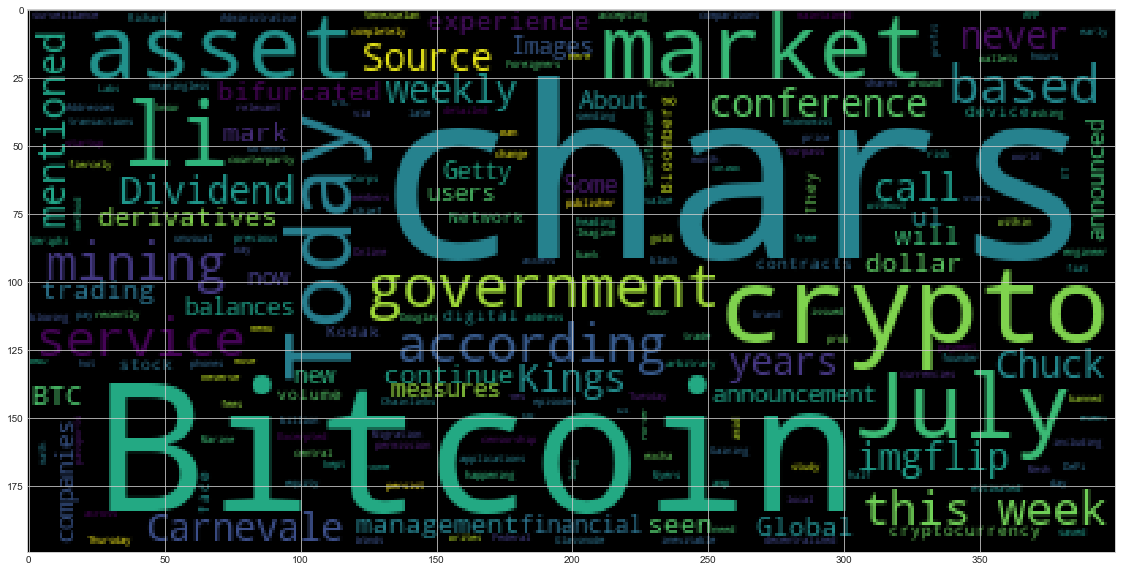

In [33]:

# Generate the Bitcoin word cloud
list_of_bit = bit_df['text'].to_list()
list_of_bit = (','.join(list_of_bit))
list_of_bit
input_text = list_of_bit
wc= WordCloud().generate(input_text)
plt.imshow(wc)

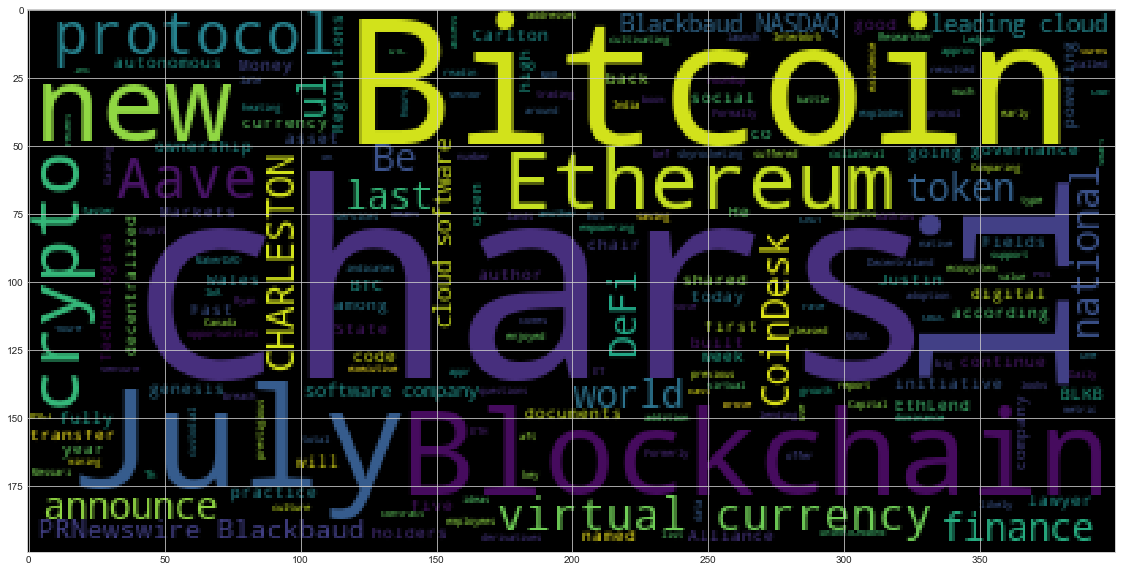

In [34]:
## Generate the Ethereum word cloud
list_of_eth = eth_df['text'].to_list()
list_of_eth = (','.join(list_of_eth))
list_of_eth
input_text = list_of_eth # rticle
wc= WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [38]:
# Concatenate all of the bitcoin text together
list_of_bit = bit_df['text'].to_list()
list_of_bit = (','.join(list_of_bit))
list_of_bit


'(Source: imgflip)\r\nToday the Dividend Kings had their weekly conference call and Chuck Carnevale mentioned that never in his 50 years of asset management experience has he seen such a bifurcated mark… [+39136 chars],(Source: imgflip)\r\nToday the Dividend Kings had their weekly conference call and Chuck Carnevale mentioned that never in his 50 years of asset management experience has he seen such a bifurcated mark… [+39136 chars],Bitcoin, crypto derivatives and DeFi continue to be hot in late July.\r\n<ul><li>Bitcoin (BTC) trading around $11,236 as of 20:00 UTC (4 p.m. ET). Gaining 2% over the previous 24 hours.</li><li>Bitcoin… [+4441 chars],Richard Myers is an decentralized applications engineer at GoTenna and Global Mesh Labs. \r\nOnline censorship and surveillance will persist as long as local fiat currencies are the only way to pay for… [+6337 chars],Here is what you need to know on Thursday, July 30:\r\nThe dollar maintained the sour tone heading into the US Federal Reserve an

In [39]:
# Run the NER processor on all of the text
doc = nlp(list_of_bit)
# Add a title to the document
doc.user_data['title']= "Bitcoin NER"



In [40]:
# Render the visualization

displacy.render(doc, style ='ent')

In [41]:
# List all Entities
print([ent.text for ent in doc.ents])

['Today', 'weekly', 'Chuck Carnevale', '50 years', 'Today', 'weekly', 'Chuck Carnevale', '50 years', 'DeFi', 'late July', 'ul><li', 'Bitcoin', 'BTC', 'around $11,236 as of 20:00', '4 p.m. ET', '2%', '24', 'Bitcoin', 'chars],Richard Myers', 'GoTenna', 'Global Mesh Labs', 'Thursday, July 30', 'US', 'Federal Reserve', 'the day', 'chars],Getty Images', 'AFP', 'this month', '+3146 chars],About 93%', 'Glassnode', '11,000', 'Bitcoin', 'more than half', 'Venezuelan', 'Administrative Service for Identification', 'Tuesday', 'U.S.', 'Marine Corps', 'Douglas Porter', 'Cambridge University Press', 'William Quinn', 'John D. Turner', 'Warren Buffett Ser', 'Japanese', 'Hokkaido', 'BTC', '10,000', 'earlier this week', 'Bakkt', 'Bitcoin', 'chars],Eastman Kodak', 'today', 'This week', 'Kodak', 'India', 'Sri Lanka', 'Microsoft', 'SK', 'July 29, 2020', 'Blockchain Venture Capital Inc.', 'BVCI', 'CADT', 'Canada', 'chars],(Bloomberg', 'this weeks', 'Crypto Index', 'chars],SAINT HELIER', 'N.J.', 'July 29, 202

---

## Ethereum NER

In [42]:
# Concatenate all of the bitcoin text together
list_of_eth = eth_df['text'].to_list()
list_of_eth = (','.join(list_of_eth))
list_of_eth

"Bitcoin, crypto derivatives and DeFi continue to be hot in late July.\r\n<ul><li>Bitcoin (BTC) trading around $11,236 as of 20:00 UTC (4 p.m. ET). Gaining 2% over the previous 24 hours.</li><li>Bitcoin… [+4441 chars],SASKATCHEWAN, SK, July 29, 2020 /CNW/ - Blockchain Venture Capital Inc. (BVCI) is pleased to announce the launch of CADT, a new digital currency in Canada, with the support of custodial services from… [+5995 chars],Ledger suffered a data breach, crypto mining in India comes with questions and a new decentralized finance (DeFi) looks to offer lending and saving opportunities for PoS token holders. \r\nYoure readin… [+9422 chars],An executive vote among MKR token holders in the MakerDAO ecosystem has resulted in the addition of MANA, the native currency of the virtual world Decentraland, as a new collateral type.\r\nThis means … [+1142 chars],One key metric suggests that Ethereum (ETH) has enjoyed a much faster rate of adoption and growth in the first five years of existenc

In [43]:
# Run the NER processor on all of the text
doc = nlp(list_of_eth)
# Add a title to the document
doc.user_data['title']= "Ethereum NER"



In [44]:
# Render the visualization
displacy.render(doc, style ='ent')

In [45]:
### List all Entities
print([ent.text for ent in doc.ents])

['Bitcoin', 'DeFi', 'late July', 'ul><li', 'Bitcoin', 'BTC', 'around $11,236 as of 20:00', '4 p.m. ET', '2%', '24', 'Bitcoin', 'SK', 'July 29, 2020', 'Blockchain Venture Capital Inc.', 'BVCI', 'CADT', 'Canada', 'chars],Ledger', 'India', 'DeFi', 'PoS', 'MKR', 'MANA', 'Ethereum (ETH', 'the first five years', 'Bitcoin', 'BTC', 'Formerly EthLend', 'East', 'five', 'CoinDesk’s Markets Daily', 'chars],CHARLESTON', 'S.C.', 'July 29, 2020', 'Blackbaud', 'today', "Fast Company's", 'CHARLESTON', 'S.C.', 'July 29, 2020', 'Blackbaud', 'chars],CHARLESTON', 'S.C.', 'July 29, 2020', 'Blackbaud', 'today', "Fast Company's", 'chars],Justin Wales', 'Carlton Fields', 'State Regulations on Virtual Currency', 'Blockchain Technologies', 'Carlton Fields', '“State Regulations on Virtual Currency and Blockchain Technologies', 'Messari', 'DeFi', 'Ryan Watkins', 'InterWork Alliance', 'the Enterprise Ethereum Alliance', '+3279 chars],Earlier', 'July', 'Facebook', 'Netflix', 'chars],<ul><li', 'Bitcoin', 'as high as 